# Prueba Antisacádica

In [2]:
%matplotlib inline

import bsp.core
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [14, 8]

## Cargar el estudio
Un **estudio** es un registro que se le hace a un paciente.

Estudio -> Pruebas -> Señales

In [3]:
from bsp.core import load_study
study = load_study("data/20240420-rbg-antisaccade.bsp")

print(f"El estudio tiene {len(study)} pruebas")
print()
for index, test in enumerate(study):
    print(index, test)

El estudio tiene 3 pruebas

0 HorizontalCalibration at 30°
1 HorizontalAntisaccadic at 30°
2 HorizontalCalibration at 30°


In [4]:
study.protocol ##Debería de ser antisacadic???

<Protocol.Saccadic: 'saccadic'>

In [5]:
study.json

{'version': '1.0',
 'recorded_at': 1713608471.792647,
 'tests': [{'test_type': 'HorizontalCalibration',
   'angle': 30,
   'fs': 1000,
   'length': 20000,
   'hor_annotations': [],
   'ver_annotations': []},
  {'test_type': 'HorizontalAntisaccadic',
   'angle': 30,
   'fs': 1000,
   'length': 40000,
   'hor_annotations': [],
   'ver_annotations': []},
  {'test_type': 'HorizontalCalibration',
   'angle': 30,
   'fs': 1000,
   'length': 20000,
   'hor_annotations': [],
   'ver_annotations': []}],
 'hor_calibration': 0.07837202458679882,
 'hor_calibration_diff': 1.0345377263836386,
 'ver_calibration': 1.0,
 'ver_calibration_diff': 1.0,
 'protocol': 'saccadic'}

# Obtener una prueba especifica del estudio:

## Pruebas: Horizontal y Vertical - Posición

In [5]:
antisacade = study[1]

In [ ]:
antisacada.

In [6]:
antisacade.test_type

<TestType.HorizontalAntisaccadic: 'HorizontalAntisaccadic'>

In [7]:
antisacade.hor_stimuli

array([  0.   ,   0.   ,   0.   , ..., -24.576, -24.576, -24.576],
      dtype=float32)

In [8]:
antisacade.hor_channel

array([0.29317093, 0.29317093, 0.29317093, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [9]:
antisacade.hor_stimuli_raw

array([32768, 32768, 32768, ...,     0,     0,     0], dtype=int32)

In [10]:
antisacade.hor_channel_raw

array([534, 535, 538, ...,   0,   0,   0], dtype=uint16)

In [11]:
antisacade.hor_annotations

[]

In [12]:
antisacade.ver_annotations

[]

In [13]:
antisacade.hor_saccades

[]

In [14]:
antisacade.annotate

<bound method Test.annotate of <bsp.core.models.Test object at 0x103b3b1c0>>

In [15]:
samples_to_remove = 100
samples = len(antisacade.hor_stimuli)
print("Esta prueba tiene " + str(samples)  + " muestras")

Esta prueba tiene 40000 muestras


Frecuencia de muestreo es de 1KHz, por lo que, cada muestra es un 1 ms. 

La variable del tiempo se va a cambiar de ms a s:

In [16]:
time = np.arange(samples) / 1000.0  # segundos
time = time[samples_to_remove:-samples_to_remove]


horizontal = antisacade.hor_channel.copy()[samples_to_remove:-samples_to_remove]
stimuli_horizontal = antisacade.hor_stimuli.copy()[samples_to_remove:-samples_to_remove]
   
vertical = antisacade.ver_channel.copy()[samples_to_remove:-samples_to_remove]
stimuli_vertical = antisacade.hor_stimuli.copy()[samples_to_remove:-samples_to_remove]

SAMPLES = 10000
time1 = time[:SAMPLES]
horizontal1 = horizontal[:SAMPLES]
stimuli_horizontal1 = stimuli_horizontal[:SAMPLES]
vertical1 = vertical[:SAMPLES]
stimuli_vertical1 = stimuli_vertical[:SAMPLES]

In [17]:
amplitude = horizontal.max() - horizontal.min()

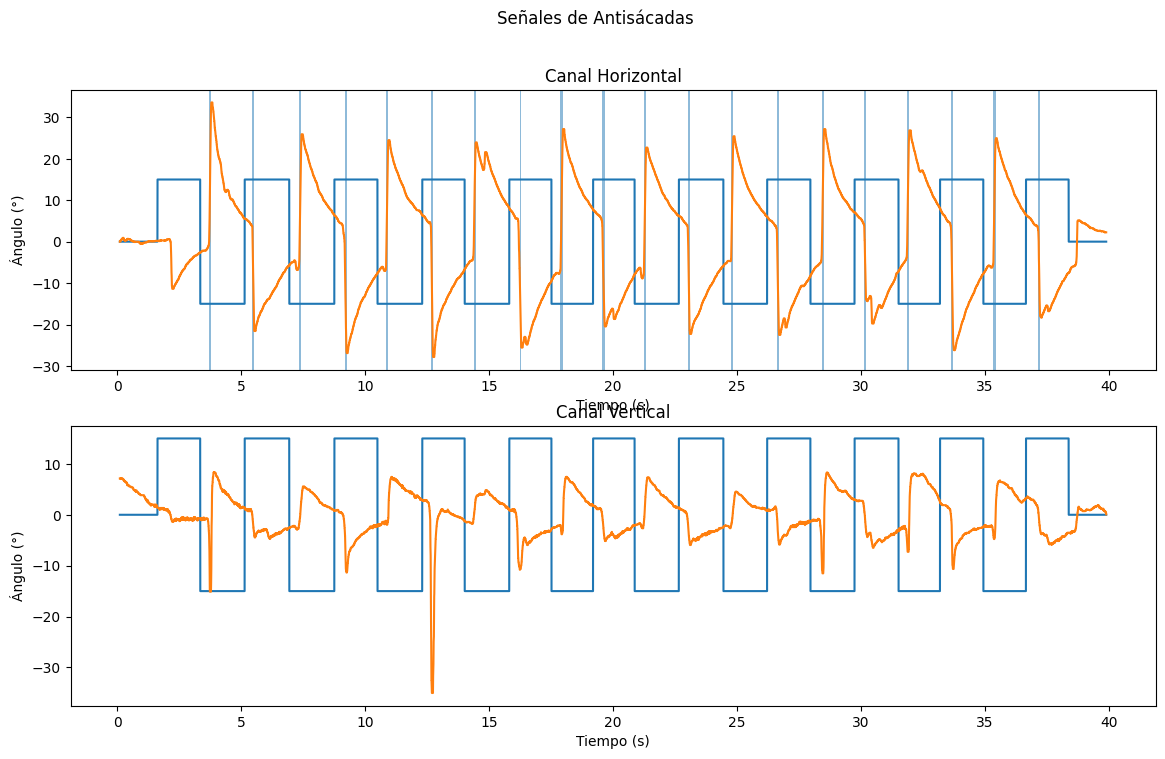

In [18]:
from bsp.core import impulses

plt.suptitle("Señales de Antisácadas")

plt.subplot(211)
plt.title("Canal Horizontal")
for start, end in impulses(horizontal):
#for start, end in saccades(antisacade.hor_channel, antisacade.angle, 0.2):
    plt.axvspan((start + samples_to_remove)/1000, (end + samples_to_remove)/1000, alpha=0.5)
plt.plot(time, stimuli_horizontal)
plt.plot(time, horizontal)
plt.ylabel("Ángulo (°)");
plt.xlabel("Tiempo (s)")
#plt.xlim(6, 8)  # Limitar el eje x de 0 a 5 segundos

plt.subplot(212)
plt.title("Canal Vertical")
plt.plot(time, stimuli_vertical)
plt.plot(time, vertical)
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)");


## Velocidad

In [19]:
from bsp.core import differentiate, denoise
from scipy.signal import medfilt

horizontal_filtered = medfilt(horizontal, 201)
velocities = differentiate(antisacade.hor_channel[samples_to_remove:-samples_to_remove])
velocities_filtered = medfilt(velocities, 91)

(8.0, 16.0)

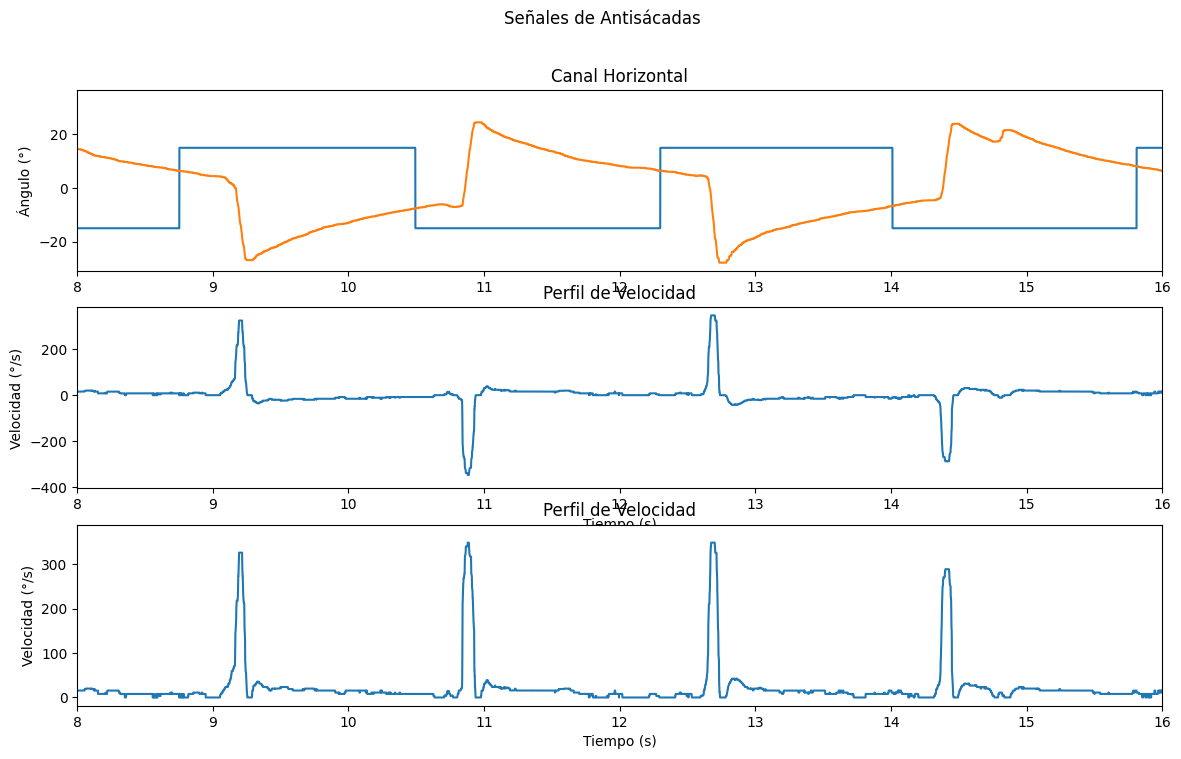

In [52]:
plt.suptitle("Señales de Antisácadas")

plt.subplot(311)
plt.title("Canal Horizontal")
plt.plot(time, stimuli_horizontal)
plt.plot(time, horizontal)
plt.ylabel("Ángulo (°)")
plt.xlim(8, 16)

plt.subplot(312)
plt.title("Perfil de Velocidad")
plt.plot(time, velocities_filtered)
#plt.plot(time, velocities)
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (°/s)");
plt.xlim(8, 16)

plt.subplot(313)
plt.title("Perfil de Velocidad")
plt.plot(time, abs(velocities_filtered))
#plt.plot(time, abs(velocities))
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (°/s)");
plt.xlim(8,16)


## Impulses

In [21]:
from bsp.core import impulses

impulse_generator = impulses(horizontal)
for start, end in impulse_generator:
    print(horizontal[start:end])
    #if (start/1000 >= indice_inicio and end/1000 <= indice_fin/1000):
    print("Impulse:", start/1000, end/1000) #segundos


[-0.25543213 -0.25543213 -0.25543213 -0.56892014 -0.88240814 -1.1175232
 -1.352642   -1.5877571  -1.9012451  -2.1363602  -2.293106   -2.3714752
 -2.3714752  -2.3714752  -2.5282211  -2.6849632  -2.920082   -3.23357
 -3.3903122  -3.547058   -3.7821732  -4.174034   -4.644264   -5.114498
 -5.663101   -6.054962   -6.446823   -6.760311   -6.917053   -7.230541  ]
Impulse: 2.053 2.083
[ -7.622402  -7.622402  -7.779148  -8.249378  -8.641239  -8.954727
  -9.346586  -9.738447 -10.130308 -10.365423 -10.60054 ]
Impulse: 2.088 2.099
[-0.72566605 -0.6472931  -0.56892014 -0.56892014 -0.41217804 -0.41217804
 -0.41217804 -0.33380508 -0.25543213  0.05805588  0.44991684  0.92014694
  1.4687538   1.9389839   2.4092178   2.801075    2.879448    2.957821
  3.0361938   3.192936    3.506424    3.819912    4.1334      4.368519
  4.446888    4.603634    4.760376    5.152237    5.622471    6.171074
  6.79805     7.425026    8.052002    8.522236    9.149212    9.697815
 10.168049   10.559906   10.873394   11.18688

## Saccades

In [22]:
horizontal;

In [23]:
antisacade.hor_channel;

In [24]:
antisacade.angle;
delta_amplitude = antisacade.angle * 0.2
print(delta_amplitude)


6.0


In [25]:
antisacade.test_type

<TestType.HorizontalAntisaccadic: 'HorizontalAntisaccadic'>

In [26]:
from bsp.core.saccades import saccades

saccades_generator = saccades(antisacade.hor_channel, antisacade.angle)
c=0
for onset, offset in saccades_generator:
    c += 1
    print("Saccade onset:", onset, "Saccade offset:", offset)
print(c)

Saccade onset: 3691 Saccade offset: 3787
Saccade onset: 5443 Saccade offset: 5522
Saccade onset: 7325 Saccade offset: 7428
Saccade onset: 9156 Saccade offset: 9253
Saccade onset: 10836 Saccade offset: 10931
Saccade onset: 12641 Saccade offset: 12738
Saccade onset: 14360 Saccade offset: 14461
Saccade onset: 16174 Saccade offset: 16297
Saccade onset: 17877 Saccade offset: 17974
Saccade onset: 19550 Saccade offset: 19663
Saccade onset: 21242 Saccade offset: 21332
Saccade onset: 23004 Saccade offset: 23100
Saccade onset: 24753 Saccade offset: 24861
Saccade onset: 26596 Saccade offset: 26701
Saccade onset: 28402 Saccade offset: 28514
Saccade onset: 31834 Saccade offset: 31956
Saccade onset: 33630 Saccade offset: 33744
Saccade onset: 35335 Saccade offset: 35450
18


In [27]:
antisacade.hor_saccades

[]

**Valor de la velocidad** -> depende del filtro

In [28]:
tiempo_inicio = 2  # segundos
tiempo_fin = 4  # segundos

# Encontrar los índices correspondientes al intervalo de tiempo
indice_inicio = np.argmax(time >= tiempo_inicio)
indice_fin = np.argmax(time >= tiempo_fin)

velocities_filtered_intervalo_tiempo = velocities_filtered[indice_inicio:indice_fin]

# Encontrar máxima velocidad dentro del intervalo de tiempo
max_vel_intervalo_tiempo = np.max(velocities_filtered_intervalo_tiempo)

print("El valor máximo de velocidad dentro del intervalo de tiempo de {} a {} segundos es: {}".format(tiempo_inicio, tiempo_fin, max_vel_intervalo_tiempo))


El valor máximo de velocidad dentro del intervalo de tiempo de 2 a 4 segundos es: 63.58934801126878


# Cálculo biomarcadores agregados

## Contador antisácadas
¿Cómo identificar el inicio de una antisácada? Con el vector velocidad o posición
  - Cuando inicio una antisácada?
    - En la tesis: umbral de 30 grados/seg
    - En código: se hace cuando la velocidad sobrepasa un umbral -> desviacion estandar de todas las velocidades del array.

Se producen 22 antisácadas y según el filtro capta más o menos, si ventana es 101 -> en esta prueba da 22 antisácadas


In [29]:
from bsp.core import differentiate, denoise
from scipy.signal import medfilt

velocities = medfilt(differentiate(horizontal), 91)
velocities_abs = abs(velocities)
is_in_antisaccade = False
num_antisaccades_30 = 0
num_antisaccades_desv = 0

# Umbral 30 grados/seg
threshold1 = 30
for v in velocities_abs:
    if v > threshold1 and not is_in_antisaccade:
        num_antisaccades_30 += 1
        is_in_antisaccade = True
    elif v <= threshold1 and is_in_antisaccade:
        is_in_antisaccade = False
print("El número de antisácadas es con umbral de 30°/s : ", num_antisaccades_30)

# Umbral desviación estandar de las velocidades
threshold2 = velocities.std()
for v in velocities_abs:
    if v > threshold2 and not is_in_antisaccade:
        num_antisaccades_desv += 1
        is_in_antisaccade = True
    elif v <= threshold2 and is_in_antisaccade:
        is_in_antisaccade = False
print("El número de antisácadas es con umbral de desviación típica : ", num_antisaccades_desv)

El número de antisácadas es con umbral de 30°/s :  35
El número de antisácadas es con umbral de desviación típica :  22


In [30]:
import numpy as np

instantes_cambio = []

for i in range(1, len(stimuli_horizontal)):
    if stimuli_horizontal[i] != stimuli_horizontal[i - 1]:
        instante = time[i]  # El instante de tiempo se corresponde con el índice en este caso
        instantes_cambio.append(instante)
num_antisacadas = len(instantes_cambio)
# Muestra los instantes de tiempo en los que ocurren los cambios
print("Instantes de tiempo en los que ocurren los cambios:", instantes_cambio)
print("Número de antisádas que se deben de producir", num_antisacadas)


Instantes de tiempo en los que ocurren los cambios: [1.617, 3.342, 5.135, 6.935, 8.754, 10.494, 12.3, 14.012, 15.812, 17.514, 19.193, 20.87, 22.654, 24.452, 26.216, 27.963, 29.744, 31.518, 33.192, 34.94, 36.66, 38.383]
Número de antisádas que se deben de producir 22


## Inhibición de la respuesta
$$\text{Inhibición de la respuesta} = \frac{\text{Total sácadas inapropiadas}}{\text{Total antisácadas}}$$

¿Cuándo hay una **sácada inapropiada**?
    Cuando el valor del nuevo ángulo es menor a los anteriores, ya que en una antisácada se espera un valor mayor al los anteriores en la variable del ángulo (en terminos absolutos).

    Si las antisácadas comienzan cuando la velocidad es superior a 30°/s, ver valor de velocidad en las sácadas inapropiadas

In [31]:
# Total antisácadas que se producen -> antisácada se da cuando v >= 30
threshold3 = 30
for v in velocities_abs:
    if v > threshold2 and not is_in_antisaccade:
        num_antisaccades_desv += 1
        is_in_antisaccade = True
    elif v <= threshold2 and is_in_antisaccade:
        is_in_antisaccade = False
print("El número de antisácadas es con umbral de desviación típica : ", num_antisaccades_desv)

# Total sácadas inapropiadas

El número de antisácadas es con umbral de desviación típica :  44


# Cálculo biomarcadores por movimiento

## Analizo 1 antisácada

indice_inicio: 5900
indice_fin: 7901
longitud de estimulo 39800
longitud de time 39800
-6.838684
151


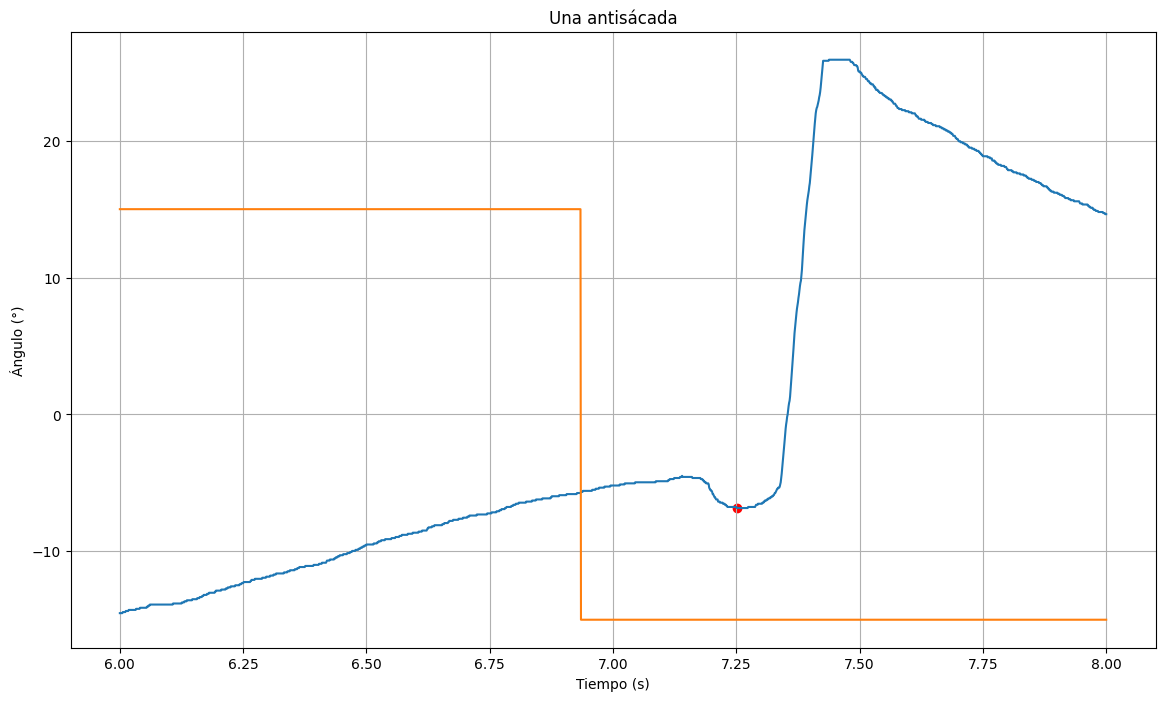

In [32]:
indice_inicio = np.argmax(time >= 6)
indice_fin = np.argmax(time > 8)

print("indice_inicio:", indice_inicio)
print("indice_fin:", indice_fin)

horizontal_intervalo = horizontal[indice_inicio:indice_fin]
time_intervalo = time[indice_inicio:indice_fin]
stimuli_intervalo = stimuli_horizontal[indice_inicio:indice_fin]


plt.title("Una antisácada")
plt.plot(time_intervalo, horizontal_intervalo)
plt.plot(time_intervalo, stimuli_intervalo)
#plt.plot(time, stimuli_horizontal)
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)");
plt.grid(True)

print("longitud de estimulo", len(stimuli_horizontal))
print("longitud de time", len(time))

print(min(horizontal[7000:7500]))
print(np.argmin(horizontal[7000:7500]))
plt.scatter(((np.argmin(horizontal[7000:7500])/1000)+ 7.1), min(horizontal[7000:7500]), color='red', label='Punto')

## Analizo otra sácada

In [3]:
indice_inicio = np.argmax(time >= 6)
indice_fin = np.argmax(time > 8)

print("indice_inicio:", indice_inicio)
print("indice_fin:", indice_fin)

horizontal_intervalo = horizontal[indice_inicio:indice_fin]
time_intervalo = time[indice_inicio:indice_fin]
stimuli_intervalo = stimuli_horizontal[indice_inicio:indice_fin]


plt.title("Una antisácada")
plt.plot(time_intervalo, horizontal_intervalo)
plt.plot(time_intervalo, stimuli_intervalo)
#plt.plot(time, stimuli_horizontal)
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)");
plt.grid(True)

print("longitud de estimulo", len(stimuli_horizontal))
print("longitud de time", len(time))

print(min(horizontal[35000:37000]))
print(np.argmin(horizontal[35000:37000]))
plt.scatter(((np.argmin(horizontal[35000:37000]/1000)+ 7.1), min(horizontal[35000:37000]), color='red', label='Punto')

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (331928303.py, line 25)

## Estímulo
¿Cuándo se produce el estímulo?

In [33]:
cambio_estimulo = np.where(np.diff(stimuli_intervalo) != 0)[0]
instante_cambio = time_intervalo[cambio_estimulo]

# Muestra los instantes de tiempo en los que cambia el estímulo
print("Indice_cambio_estimulo:", cambio_estimulo/1000)
print("Instantes de tiempo en los que cambia el estímulo:", instante_cambio)

Indice_cambio_estimulo: [0.934]
Instantes de tiempo en los que cambia el estímulo: [6.934]


## Latencia Antisacádica
$$\text{Latencia antisacádica} = (X_{\text{inicio antisácada}} - X_{\text{inicio estímulo}}) \times \text{Intervalo de muestras}$$

In [34]:
fs = 1000;
intervalo_muestras = 1/fs

inicio_estimulo = instante_cambio

velocities_intervalo = velocities[indice_inicio:indice_fin]
velocities_intervalo_abs = abs(velocities_intervalo)

# Inicio antisácada
antisacada_iniciada = False
antisacada_finalizada = False
for i in range(1, len(velocities_intervalo_abs)):
    if (velocities_intervalo_abs[i] >= 30 and antisacada_iniciada == False):
        onset_ms = i
        velocidad_inicio = velocities_intervalo_abs[i]
        antisacada_iniciada = True
    elif (velocities_intervalo_abs[i] <=30 and antisacada_iniciada == True and antisacada_finalizada == False):
        offset_ms = i
        velocidad_fin = velocities_intervalo_abs[i]
        antisacada_finalizada = True

onset_s = onset_ms/fs
offset_s = offset_ms/fs

print("onset_s: ", onset_s)
print("offset_s: ", offset_s)
print("longitud horizontal_intervalo: ", len(horizontal_intervalo))

onset_s:  1.319
offset_s:  1.428
longitud horizontal_intervalo:  2001


Ángulo inicio de la antisácada:  -6.054962
Ángulo fin de la antisácada:  25.842453
Inicio de la antisácada en el segundo:  7.319
Fin antisácada en el segundo:  7.428


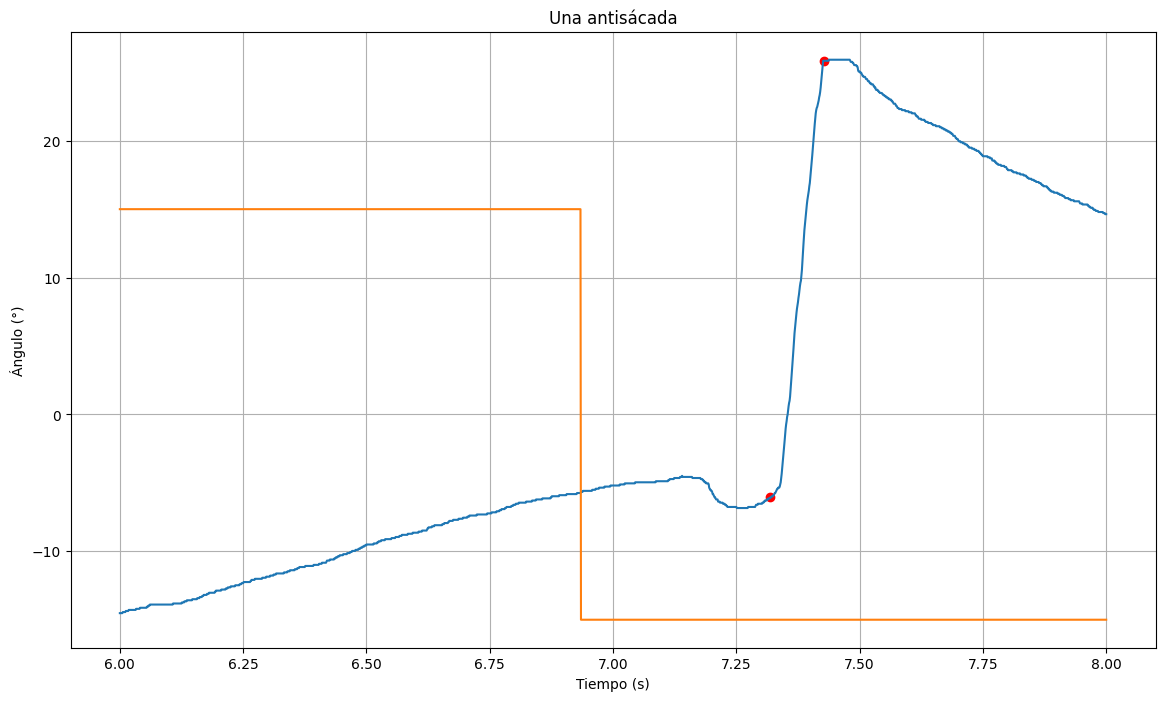

In [35]:
plt.title("Una antisácada")
plt.plot(time_intervalo, horizontal_intervalo)
plt.plot(time_intervalo, stimuli_intervalo)
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)");
plt.grid(True)

inicio_antisacada = onset_s + time_intervalo[0]
fin_antisacada = offset_s + time_intervalo[0]

plt.scatter(inicio_antisacada, horizontal_intervalo[onset_ms], color='red', label='Punto')
plt.scatter(fin_antisacada, horizontal_intervalo[offset_ms], color='red', label='Punto')

print("Ángulo inicio de la antisácada: ", horizontal_intervalo[onset_ms])
print("Ángulo fin de la antisácada: ", horizontal_intervalo[offset_ms])

print("Inicio de la antisácada en el segundo: ", inicio_antisacada)
print("Fin antisácada en el segundo: ", fin_antisacada)

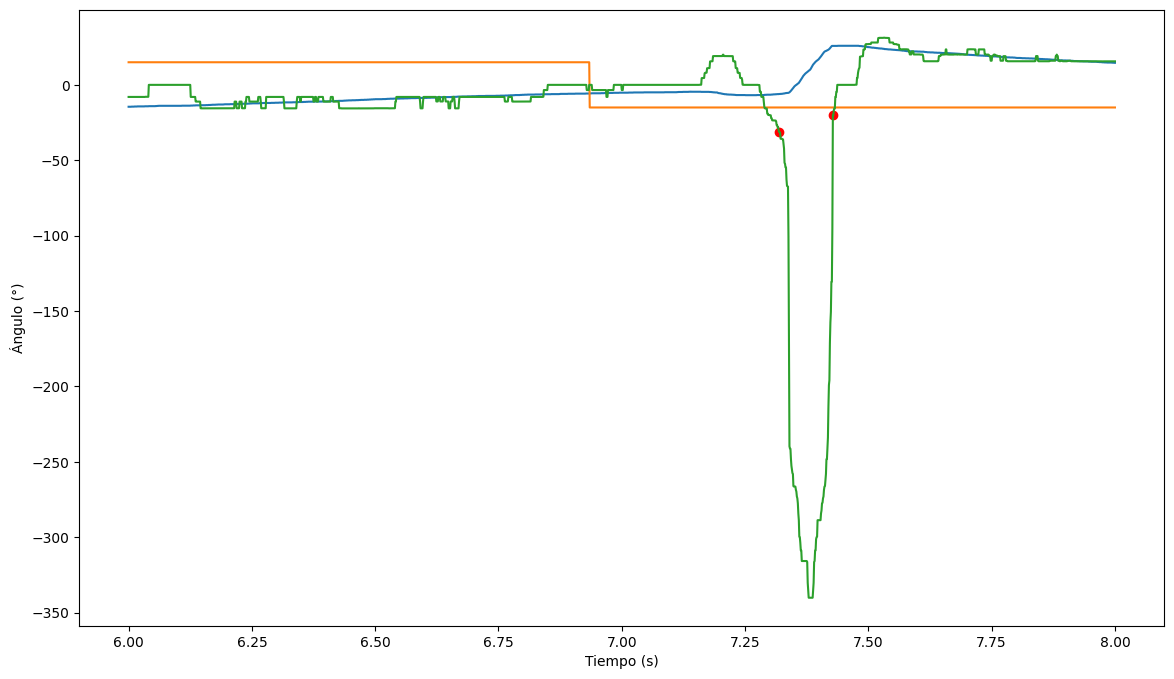

In [36]:
plt.plot(time_intervalo, horizontal_intervalo)
plt.plot(time[indice_inicio:indice_fin], stimuli_intervalo)
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)");

plt.plot(time_intervalo, velocities_intervalo)
plt.scatter(onset_s + time_intervalo[0], -velocidad_inicio, color='red', label='Punto')
plt.scatter(offset_s + time_intervalo[0], -velocidad_fin, color='red', label='Punto')

In [37]:
latencia = abs(inicio_estimulo - inicio_antisacada) # No se multiplica por intervalo de muestras porque se ha hecho antes
print("Latencia Antisacádica (segundos): ", latencia)

Latencia Antisacádica (segundos):  [0.385]


## Velocidad máxima


Velocidad máxima es:  340.1904658189372
indice_velocidad_max es:  1379
indice_velocidad_max_seg es:  1.379


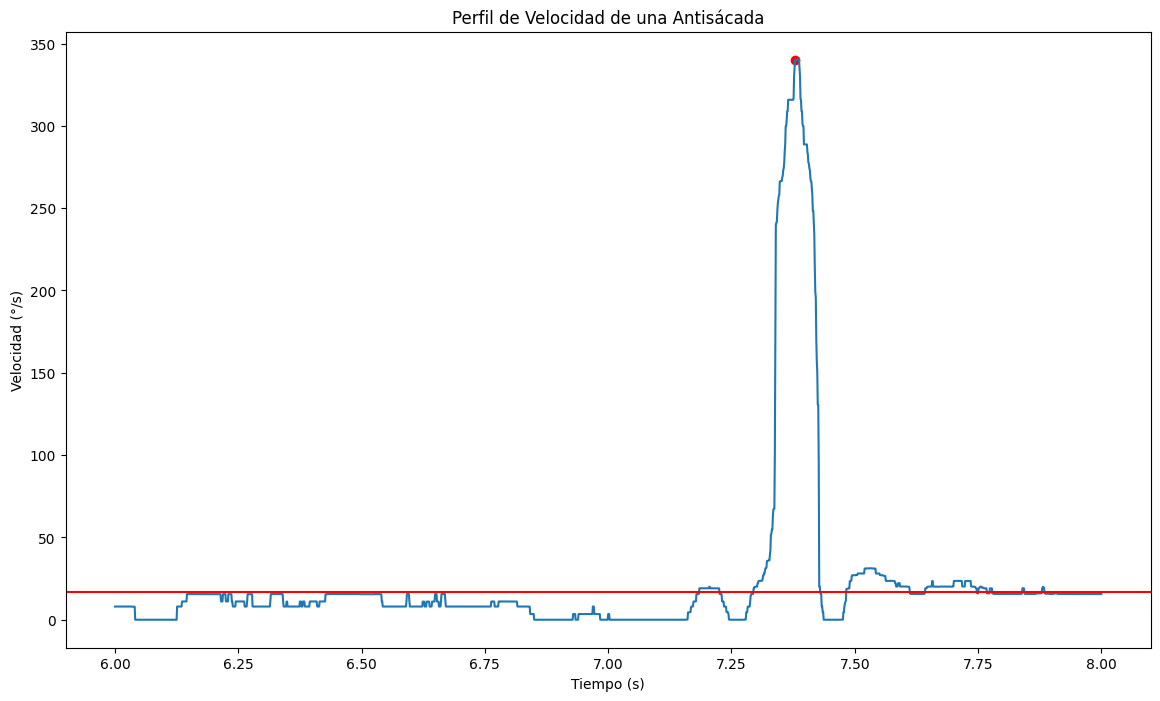

In [44]:
velocidad_max = max(abs(velocities_intervalo))
print("Velocidad máxima es: ", velocidad_max)

indice_velocidad_max = np.argmax(abs(velocities_intervalo))
print("indice_velocidad_max es: ", indice_velocidad_max)
indice_velocidad_max_seg = indice_velocidad_max/fs # Son importantes los decimales en segundos
print("indice_velocidad_max_seg es: ", indice_velocidad_max_seg)

plt.title("Perfil de Velocidad de una Antisácada")
plt.plot(time_intervalo, abs(velocities_intervalo))
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (°/s)");
plt.scatter(indice_velocidad_max_seg + time_intervalo[0], velocidad_max, color='red', label='Punto')
plt.axhline(17, color='red')
plt.savefig("Umbral_MicroSácada.eps", format="eps")

## Precisión de la localización del estímulo en la memoria
$$\text{Precisión de la localización del estímulo en memoria} = \frac{\text{Amplitud del estímulo}-\text{Amplitud de la antisácada}}{\text{Amplitud del estímulo}}$$

$$\text{Amplitud de la antisácada} = \left| Y_{\text{fin antisácada}} - Y_{\text{inicio antisácada}} \right|$$

In [40]:
# Amplitud
angulo_inicio_antisacada = horizontal_intervalo[onset_ms]
angulo_fin_antisacada = horizontal_intervalo[offset_ms]
amplitud = abs(horizontal_intervalo[offset_ms]-horizontal_intervalo[onset_ms])
print("Ángulo de inicio: {}. Ángulo de fin: {}. Amplitud: {}".format(angulo_inicio_antisacada, angulo_fin_antisacada, amplitud))

Ángulo de inicio: -6.054962158203125. Ángulo de fin: 25.842453002929688. Amplitud: 31.897415161132812


## Duración
$$\text{Duración} = (X_{\text{fin antisácada}} - X_{\text{inicio antisácada}}) \times \text{Intervalo de muestras}$$

In [41]:
duracion = fin_antisacada - inicio_antisacada # No se multiplica por el intervalo de muestras porque ya está en segundos
print("Duración: ", duracion)
print("Fin antisacada: {}. Inicio antisacada: {}. Duración: {}".format(fin_antisacada, inicio_antisacada, duracion))

Duración:  0.10899999999999999
Fin antisacada: 7.428. Inicio antisacada: 7.319. Duración: 0.10899999999999999


In [42]:
from bsp import impulses
 
plt.title("Canal Horizontal")
for start, end in impulses(horizontal1):
    plt.axvspan((start + samples_to_remove)/1000, (end + samples_to_remove)/1000, alpha=0.5)
plt.plot(time1, stimuli_horizontal1)
plt.plot(time1, horizontal1)
plt.ylabel("Ángulo (°)");
plt.xlabel("Tiempo (s)")
#plt.xlim(0, 5)  # Limitar el eje x de 0 a 5 segundos

ImportError: cannot import name 'impulses' from 'bsp' (/Users/sofiafernandez/Desktop/TFG/bsp/bsp/__init__.py)

# Probando calibración nueva

## Configuración del ambiente

In [44]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [14, 8]

## Carga del Estudio y el Test (Prueba)

In [45]:
from bsp.core import load_study

study = load_study("data/20240420-rbg-antisaccade.bsp")

antisaccadic = study[1]

## Funciones y Clases Utilitarias

In [83]:
import numpy as np
from numpy import ndarray, single
from scipy import signal
from enum import Enum
from bsp.core.differentiation import differentiate
from typing import Iterator

class Direction(Enum):
    Same = "same"
    Left = "left"
    Right = "right"


class Size(Enum):
    Invalid = "inv"
    Small = "small"
    Large = "large"

def scale_channel(value: np.ndarray, angle: float) -> np.ndarray:
    # Llevar el estímulo al angulo indicado
    #min_value = min(value)
    #max_value = max(value)

    #amplitude_raw = max_value - min_value
    #scale = angle / amplitude_raw
    scale = 0.07837202458679882
    print("scale", scale)
    return value.astype(single) * scale

def scale_stimuli(value: np.ndarray, angle: float) -> np.ndarray:
    min_value = min(value)
    max_value = max(value)

    amplitude_raw = max_value - min_value
    scale = angle / amplitude_raw
    print("sacale stimuli: ",  scale)
    return  value * scale

def center_signal(value: np.ndarray) -> np.ndarray:
    return value - value.mean()

def denoise_35(channel: np.ndarray) -> np.ndarray:
    # Hacemos un filtrado agresivo ya que lo que nos interesa es la forma de onda 
    # en general de la señal para identificar el desfase
    b, a = signal.butter(3, 0.035)
    y = signal.filtfilt(b, a, channel)
    return y

def impulses(
    channel: np.ndarray, 
    peaks: list[int], 
    velocity_threshold: float = 10.0,  # Grados por segundo
    duration_threshold: float = 10     # Milisegundos o muestras
) -> Iterator[tuple[int, int]]:
    for peak in peaks:
        onset = peak
        while onset > 0 and channel[onset - 1] >= velocity_threshold:
            onset -= 1
            
        offset = peak
        while offset < len(channel) - 1 and channel[offset + 1] >= velocity_threshold:
            offset += 1

        if offset - onset >= duration_threshold:
            yield onset, offset

def clasify_impulses(
    channel: np.ndarray, 
    impulses: tuple[int, int]
) -> Iterator[tuple[int, int, Direction, Size, int, float]]:
    # Onset, Offset, Direction, Size, Duration, Amplitude
    already_yielded = set()
    
    for onset, offset in impulses:
        duration = offset - onset
        
        onset_angle = channel[onset]
        offset_angle = channel[offset]

        amplitude = abs(offset_angle - onset_angle)
        if onset_angle < offset_angle:
            direction = Direction.Right
        elif onset_angle > offset_angle:
            direction = Direction.Left
        else:
            direction = Direction.Same

        if amplitude < 1.0:
            size = Size.Invalid
        elif amplitude < 5.0:
            size = Size.Small
        else:
            size = Size.Large

        if (onset, offset) not in already_yielded:
            already_yielded.add((onset, offset))
        else:
            continue

        yield onset, offset, direction, size, duration, amplitude


## Procedimiento:
- Se ha utilizado la calibración del profe para el escalado del estimulo y para la calibración del software para el escalado de la horizontal
- Despues de quitar ruido en la horizontal, he centrado de nuevo la señal
  

scale 0.07837202458679882
sacale stimuli:  0.00075
#01 - 62 86 Right Small 24 1.1829138498363392
#02 - 242 262 Right Invalid 20 0.9104386268754823
#03 - 2041 2116 Left Large 75 12.826036892670754
#04 - 3584 3701 Right Large 117 37.73926743470672
#05 - 4067 4109 Left Small 42 3.1303348356799603
#06 - 4181 4226 Left Small 45 2.168256136824496
#07 - 5335 5437 Left Large 102 26.94921804547738
#08 - 7081 7121 Left Small 40 2.442918548378472
#09 - 7222 7340 Right Large 118 33.580723048115686
#10 - 9050 9159 Left Large 109 29.81843527255125
#11 - 10634 10652 Left Invalid 18 0.7561346476219128
#12 - 10727 10842 Right Large 115 32.49630209125113
#13 - 12538 12650 Left Large 112 34.979692825992316
#14 - 12931 12948 Right Invalid 17 0.625293773138992
#15 - 14257 14364 Right Large 107 29.304751976297318
#16 - 14694 14748 Right Large 54 5.524112352594237
#17 - 16064 16207 Left Large 143 33.12809523388687
#18 - 16363 16403 Left Small 40 3.2926810256602064
#19 - 17766 17889 Right Large 123 35.9718780

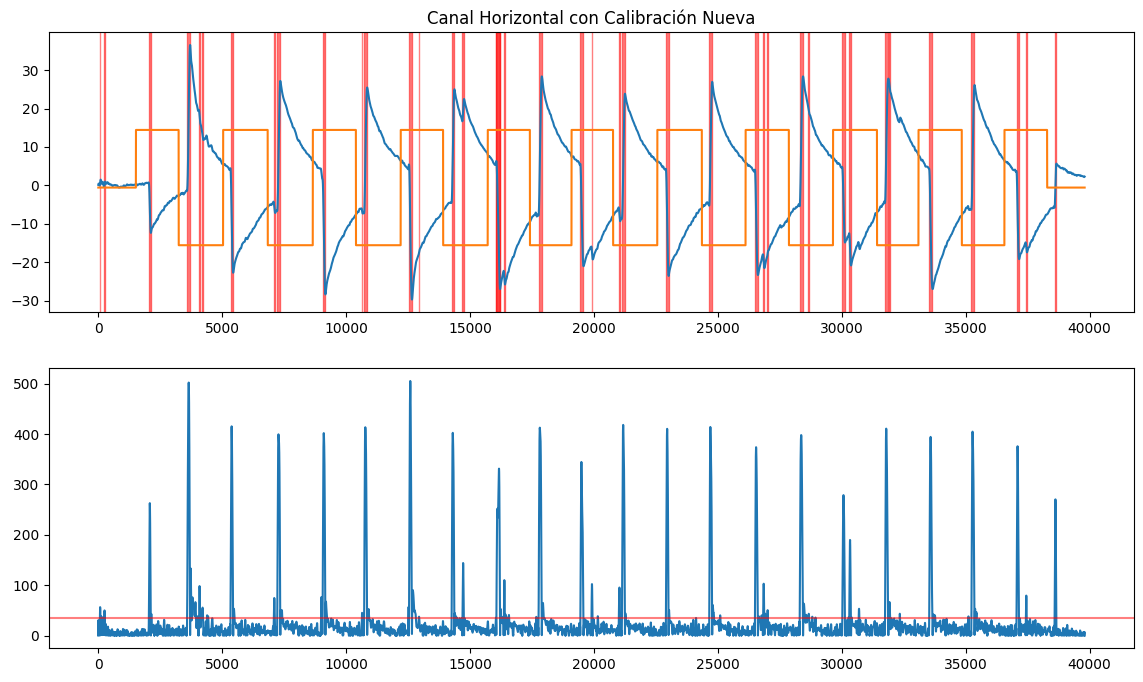

In [91]:
# Vamos a operar esta vez con la señal cruda para utilizar toda la información
# posible y controlar mejor el efecto de los algoritmos
hori_channel = antisaccadic.hor_channel_raw
stim_channel = antisaccadic.hor_stimuli_raw

# Antes que nada vamos a quitar las primeras y las últimas muestras
# Con esto evitamos problemas con el escalado
SAMPLES_TO_CUT = 100
cutted_hori_channel = hori_channel[SAMPLES_TO_CUT:-SAMPLES_TO_CUT]
cutted_stim_channel = stim_channel[SAMPLES_TO_CUT:-SAMPLES_TO_CUT]
time_channel = np.arange(len(cutted_hori_channel))

# Escalamos a los grados de la prueba antisacádica
scaled_hori_channel = scale_channel(cutted_hori_channel, antisaccadic.angle)
#scaled_stim_channel = scale_channel(cutted_stim_channel, antisaccadic.angle)
scaled_stim_channel = scale_stimuli(cutted_stim_channel, antisaccadic.angle)

# Centramos las 2 señales para que esten en el mismo espacio angular
centered_hori_channel = center_signal(scaled_hori_channel)
centered_stim_channel = center_signal(scaled_stim_channel)

# Eliminación de ruido de la señal horizontal
denoised_hori_channel = denoise_35(scaled_hori_channel)

# Centro la señal horizontal sin ruido
centered_denoised_hori_channel = center_signal(denoised_hori_channel)

# Cálculo del perfil de velocidad
vel_channel = differentiate(centered_denoised_hori_channel)
abs_vel_channel = abs(vel_channel)

# Encontrar picos utilizando la Transformada Contínua de Wavelet (CWT)
peaks = signal.find_peaks_cwt(abs_vel_channel, 30)

VELOCITY_THRESHOLD = 35
DURATION_THRESHOLD = 15

impulses_list = [
    (onset, offset)
    for onset, offset in impulses(
        channel=abs_vel_channel,
        peaks=peaks,
        velocity_threshold=VELOCITY_THRESHOLD,
        duration_threshold=DURATION_THRESHOLD,
    )
]

classified_impulses = []
for idx, (onset, offset, direction, size, duration, amplitude) in enumerate(clasify_impulses(denoised_hori_channel, impulses_list)):
    classified_impulses.append((onset, offset, direction, size, duration, amplitude))
    print(f"#{idx + 1:02} -", onset, offset, direction.name, size.name, duration, amplitude)

# Plotear
PLOT_START, PLOT_END = 0, time_channel[-1]
#PLOT_START, PLOT_END = 6000, 10000

#plt.subplot(211)
#plt.title("Canal Horizontal con Calibración Previa")
#plt.plot(time_channel[PLOT_START:PLOT_END], antisaccadic.hor_stimuli[SAMPLES_TO_CUT:-SAMPLES_TO_CUT][PLOT_START:PLOT_END])
#plt.plot(time_channel[PLOT_START:PLOT_END], antisaccadic.hor_channel[SAMPLES_TO_CUT:-SAMPLES_TO_CUT][PLOT_START:PLOT_END])

plt.subplot(211)
plt.title("Canal Horizontal con Calibración Nueva")
plt.plot(time_channel[PLOT_START:PLOT_END], centered_denoised_hori_channel[PLOT_START:PLOT_END])
plt.plot(time_channel[PLOT_START:PLOT_END], centered_stim_channel[PLOT_START:PLOT_END])
for onset, offset in impulses_list:
    if offset < PLOT_START:
        continue

    if onset > PLOT_END:
        continue
        
    plt.axvspan(onset, offset, color='red', alpha=0.5)

plt.subplot(212)
plt.plot(time_channel[PLOT_START:PLOT_END], abs_vel_channel[PLOT_START:PLOT_END])
plt.axhline(VELOCITY_THRESHOLD, color='red', alpha=0.5)
